# Event inspection tools
Last modification: 2023.07.24. </br>
Update note: Included automatic event clustering

# Initiation

In [2]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from faultoutputs_image import *
import setup_shortcut
import change_params
import myplots

sc = setup_shortcut.setups()
mp = myplots.Figpref()
ch = change_params.variate()

prefix = 'mtmod_team3/base2'
# prefix = 'Thakur20_various_fractal_profiles/v6_ab2_Dc2'
# prefix = 'Thakur20_hetero_stress/n8_v6'

# ----------
save_dir = '/export/dump/jyun/'+prefix
# plot_dir = prefix

print('Load saved data: %s/outputs'%(save_dir))
outputs = np.load('%s/outputs.npy'%(save_dir))
print('Load saved data: %s/outputs_depthinfo'%(save_dir))
dep = np.load('%s/outputs_depthinfo.npy'%(save_dir))
print('Load saved data: %s/const_params.npy'%(save_dir))
params = np.load('%s/const_params.npy'%(save_dir),allow_pickle=True)

# ----------
y,Hs,a,b,a_b,tau0,sigma0,Dc,others = ch.load_parameter(prefix)

Load saved data: /export/dump/jyun/mtmod_team3/base2/outputs
Load saved data: /export/dump/jyun/mtmod_team3/base2/outputs_depthinfo
Load saved data: /export/dump/jyun/mtmod_team3/base2/const_params.npy
No parameters changed - returning regular output


## Load variables

In [3]:
from cumslip_compute import *

image = 'sliprate'
# image = 'shearT'
print('Image %s figure'%(image))

if image == 'sliprate':
    vmin,vmax = 1e-12,1e1
elif image == 'shearT':
    vmin,vmax = -5,5
else:
    vmin,vamx = None,None

Vths = 1e-2
intv = 0.
Vlb = 0
dt_interm = 0
cuttime = 0
rths = 10
dt_creep = 2*ch.yr2sec
dt_coseismic = 0.5

cumslip_outputs = compute_cumslip(outputs,dep,cuttime,Vlb,Vths,dt_creep,dt_coseismic,dt_interm,intv)
tstart,tend = cumslip_outputs[0][0],cumslip_outputs[0][1]
system_wide,partial_rupture,event_cluster,lead_fs,major_pr,minor_pr = analyze_events(cumslip_outputs,rths)[2:]
# major_pr = event_cluster[major_pr][:,1]
# minor_pr = event_cluster[minor_pr][:,1]
evdep = cumslip_outputs[1][1]
# spin_up_idx = compute_spinup(outputs,dep,cuttime,cumslip_outputs,['yrs',200])[-1]

time = np.array([outputs[i][:,0] for i in np.argsort(abs(dep))])
cumslip = np.array([outputs[i][:,2] for i in np.argsort(abs(dep))])
shearT = abs(np.array([outputs[i][:,3] for i in np.argsort(abs(dep))]))
normalT = abs(np.array([outputs[i][:,5] for i in np.argsort(abs(dep))]))
sr = abs(np.array([outputs[i][:,4] for i in np.argsort(abs(dep))]))
z = np.sort(abs(dep))

# print('Total number of events: %d / Spin-up index: %d'%(len(tstart),spin_up_idx))
print('System-wide indexes:',system_wide)

Image sliprate figure
Cumulative slip vs. Depth plot >>> No cutting
Slip rate > 1e-02
All safe from the SR variation criterion
System-wide indexes: [0]


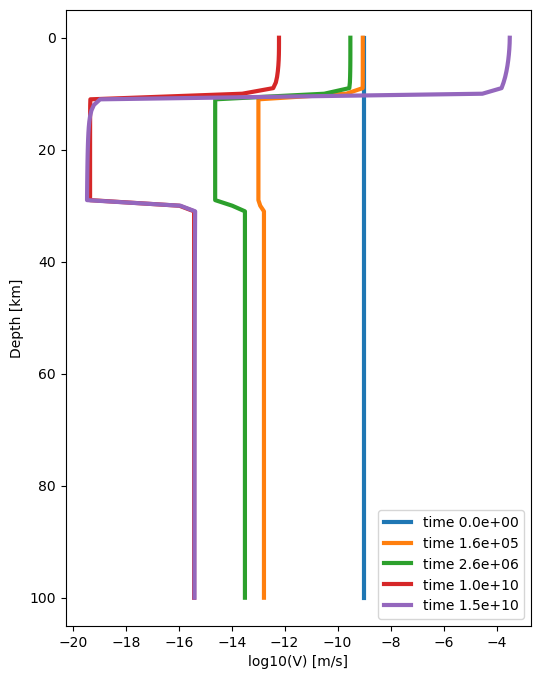

In [47]:
plt.figure(figsize=(6,8))
plt.plot(np.log10(sr[:,0]),z,lw=3,label='time %1.1e'%(time[0][0]))
plt.plot(np.log10(sr[:,10]),z,lw=3,label='time %1.1e'%(time[0][10]))
plt.plot(np.log10(sr[:,int(1e2)]),z,lw=3,label='time %1.1e'%(time[0][100]))
plt.plot(np.log10(sr[:,int(1e3)]),z,lw=3,label='time %1.1e'%(time[0][1000]))
plt.plot(np.log10(sr[:,int(1e4)]),z,lw=3,label='time %1.1e'%(time[0][10000]))
plt.legend()
# plt.plot(shearT[:,3],z,lw=3)
plt.xlabel('log10(V) [m/s]')
plt.ylabel('Depth [km]')
# plt.title('At %2.2f km'%(z[41]))
# plt.xlim(-10000,1000000)
# plt.ylim(5.1,5.3)
plt.gca().invert_yaxis()
plt.show()

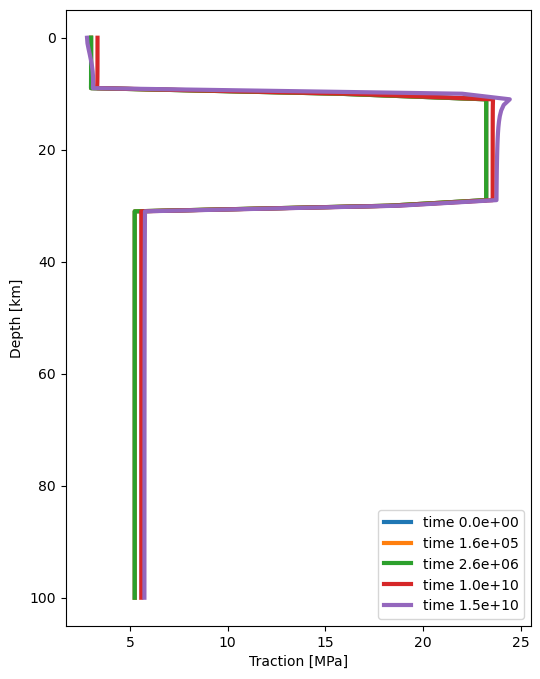

In [45]:
plt.figure(figsize=(6,8))
plt.plot(shearT[:,0],z,lw=3,label='time %1.1e'%(time[0][0]))
plt.plot(shearT[:,10],z,lw=3,label='time %1.1e'%(time[0][10]))
plt.plot(shearT[:,int(1e2)],z,lw=3,label='time %1.1e'%(time[0][100]))
plt.plot(shearT[:,int(1e3)],z,lw=3,label='time %1.1e'%(time[0][1000]))
plt.plot(shearT[:,int(1e4)],z,lw=3,label='time %1.1e'%(time[0][10000]))
plt.legend()
# plt.plot(shearT[:,3],z,lw=3)
plt.xlabel('Traction [MPa]')
plt.ylabel('Depth [km]')
# plt.title('At %2.2f km'%(z[41]))
# plt.xlim(-10000,1000000)
# plt.ylim(5.1,5.3)
plt.gca().invert_yaxis()
plt.show()

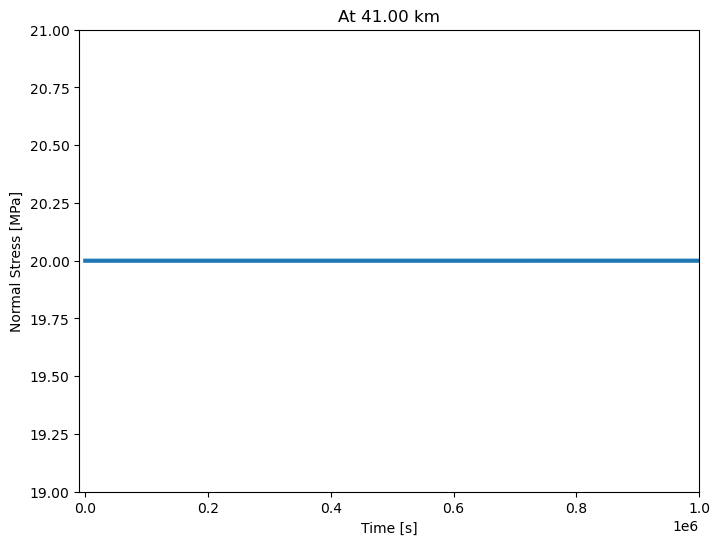

In [28]:
plt.figure(figsize=(8,6))
plt.plot(time[41],normalT[41],lw=3)
plt.xlabel('Time [s]')
plt.ylabel('Normal Stress [MPa]')
plt.title('At %2.2f km'%(z[41]))
plt.xlim(-10000,1000000)
plt.ylim(19,21)
plt.show()

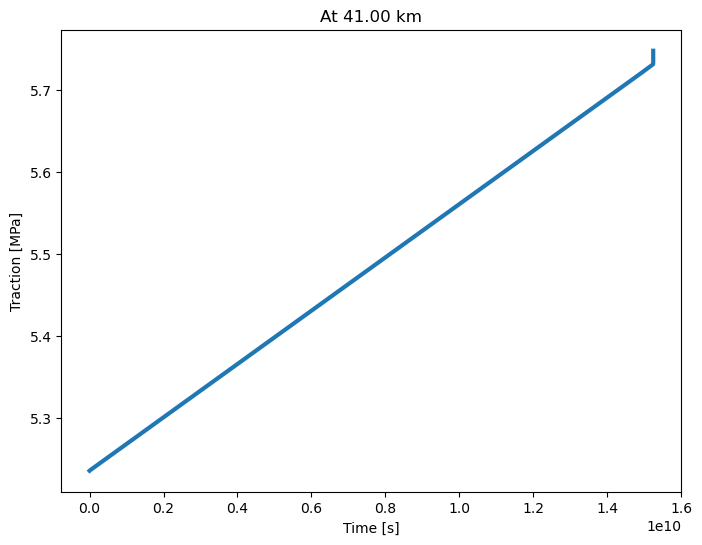

In [30]:
plt.figure(figsize=(8,6))
plt.plot(time[41],shearT[41],lw=3)
plt.xlabel('Time [s]')
plt.ylabel('Traction [MPa]')
plt.title('At %2.2f km'%(z[41]))
# plt.xlim(-10000,1000000)
# plt.ylim(5.1,5.3)
plt.show()

In [23]:
shearT[41][0]

5.236085752619313

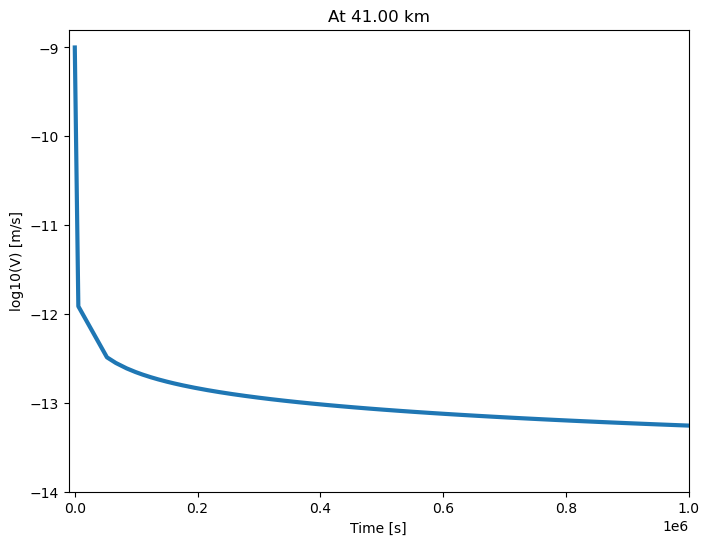

In [19]:
plt.figure(figsize=(8,6))
plt.plot(time[41],np.log10(sr[41]),lw=3)
plt.xlabel('Time [s]')
plt.ylabel('log10(V) [m/s]')
plt.title('At %2.2f km'%(z[41]))
plt.xlim(-10000,1000000)
plt.ylim(-14,-8.8)
plt.show()

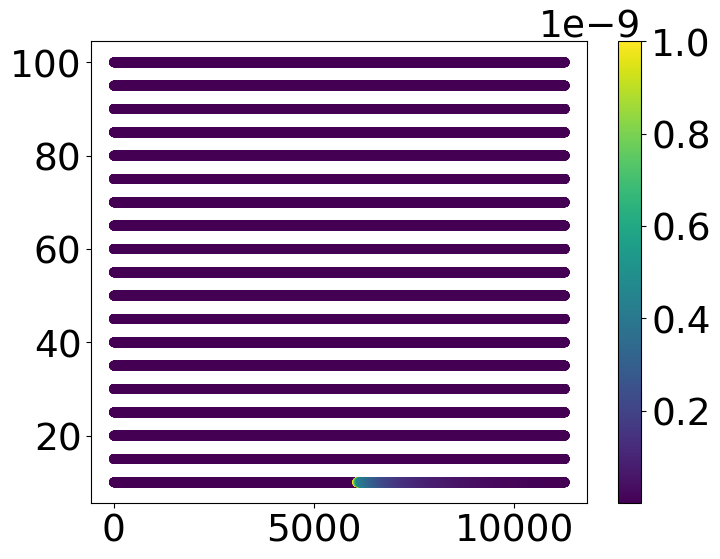

In [29]:
plt.figure(figsize=(8,6))
for k,zd in enumerate(z):
    if np.mod(zd,5) == 0:
        plt.scatter(np.arange(len(sr[k])),zd*np.ones(len(sr[k])),c=np.array(np.log10(sr[k])))
        print(min())

plt.colorbar()
plt.show()

In [29]:
id = 41
sn = normalT[id][0]
f0 = 0.6
Vp = 1e-9
V0 = 1e-6
dip = np.deg2rad(30)
tau = sn*0.6+np.log(Vp/np.cos(dip)/V0)
print(tau)

5.236085757243753


# Plot the whole cycle

Full image
Plot in time steps
No parameters changed - returning regular output


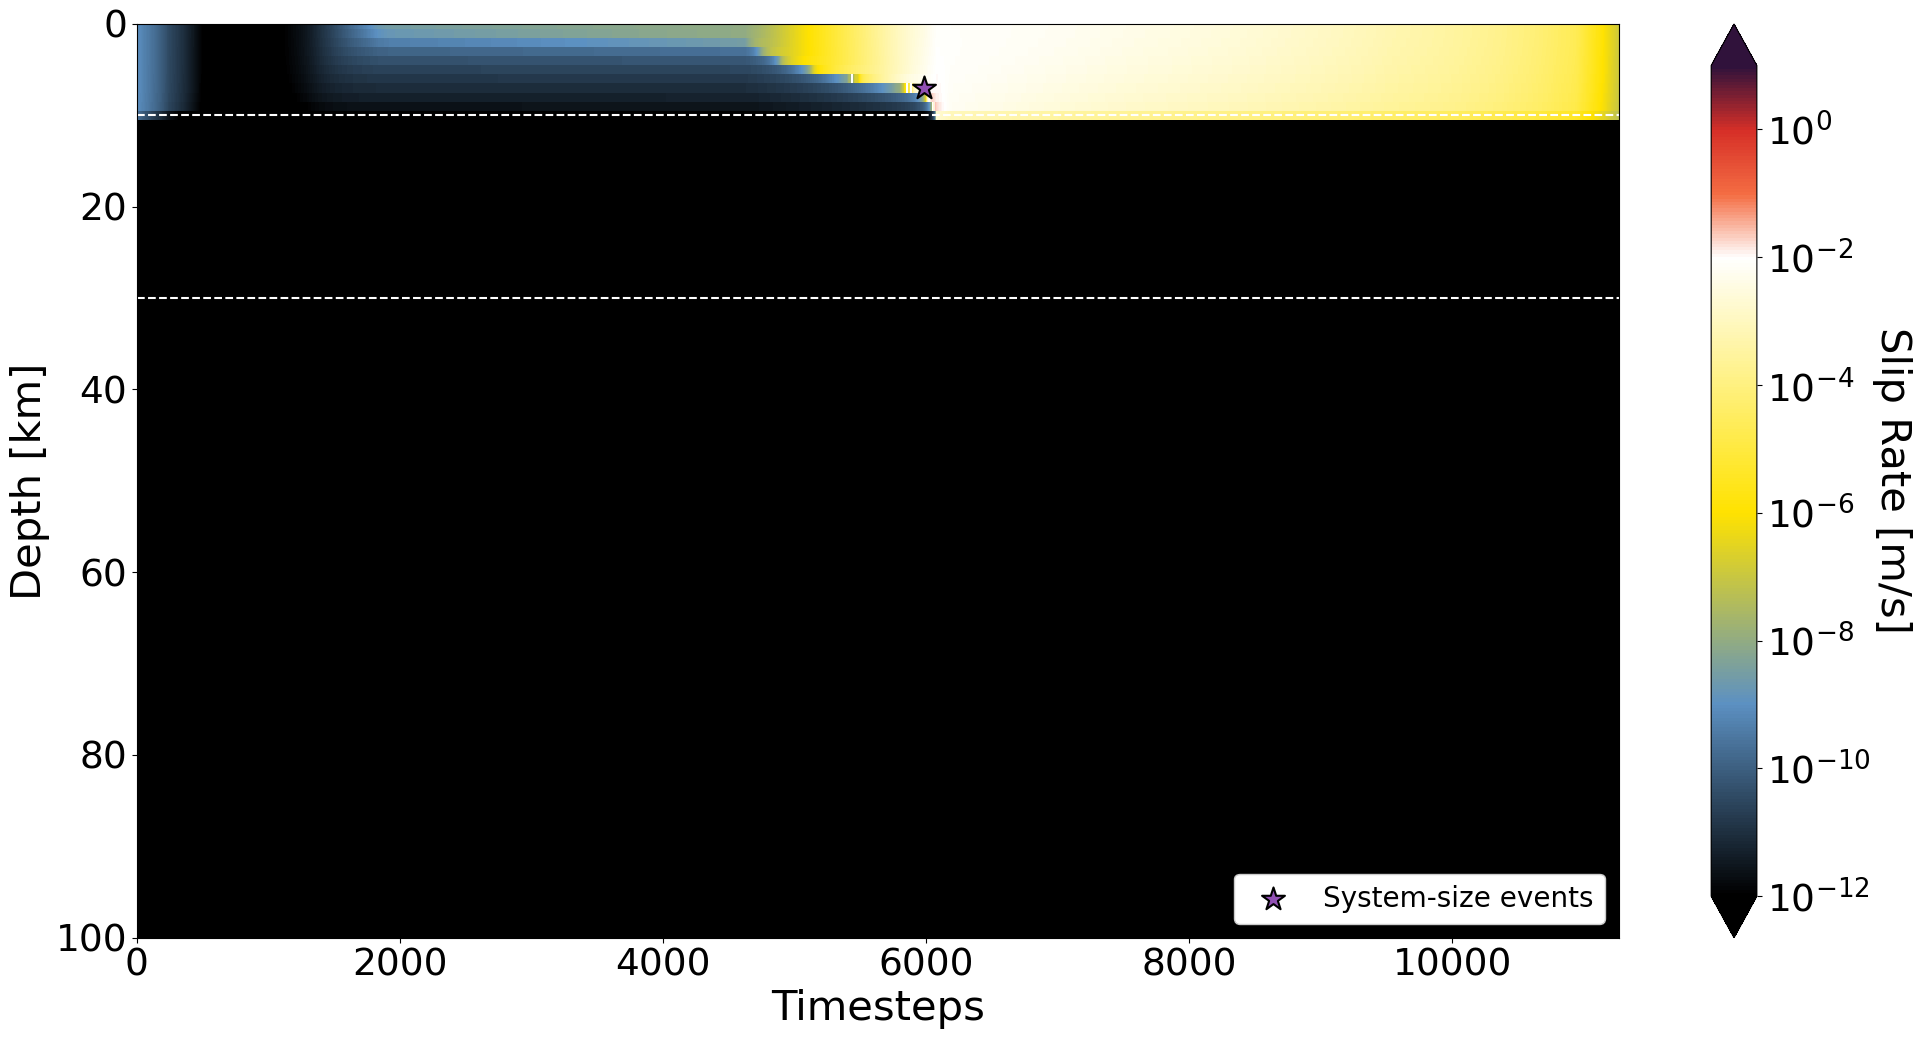

In [6]:
save_on = 0
ax=fout_image(image,outputs,dep,params,cumslip_outputs,save_dir,prefix,rths,vmin,vmax,Vths,[],plot_in_timestep=True,plot_in_sec=False,save_on=save_on)

## Zoom in

In [ ]:
save_on = 0
ax=fout_image(image,outputs,dep,params,cumslip_outputs,save_dir,prefix,rths,vmin,vmax,Vths,[int(2e5),int(3e5)],plot_in_timestep=True,plot_in_sec=False,save_on=save_on)

In [ ]:
plt.colorbar(cb,extend='both').set_label(cb_label,fontsize=30,rotation=270,labelpad=30)

# Zoom into a specific coseismic period

In [ ]:
iev = 116
buffer1 = 1000
buffer2 = buffer1
zoom_frame = [iev,buffer1,buffer2]
its_all,ite_all,tsmin,tsmax,its,ite = class_figtype(zoom_frame,outputs,cumslip_outputs,print_on=True)[2:8]

## Image plot

In [ ]:
save_on = 0
fout_image(image,outputs,dep,params,cumslip_outputs,save_dir,prefix,rths,vmin,vmax,Vths,zoom_frame,plot_in_timestep=False,plot_in_sec=True,save_on=save_on)

## Image plot with peak slip rate series

In [ ]:
save_on = 1
ax = fout_image(image,outputs,dep,params,cumslip_outputs,save_dir,prefix,rths,vmin,vmax,Vths,[iev,buffer1,buffer2],plot_in_timestep=False,plot_in_sec=True,cb_on=False,save_on=save_on)
xl = ax.get_xlim()
ax.hlines(y=11.2,xmin=xl[0],xmax=xl[1],lw=2,zorder=3,color=(115/255,1,1))

ax2 = ax.twinx()
if image == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif image == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [5,70]
t = time[0][its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
if save_on:
    plt.savefig('%s/withPEAK_zoom_%s_image_ev%d.png'%(save_dir,image,iev),dpi=300)


## Peak variable along the fault

In [ ]:
def show_zoom(ax,time,its,buffer1,ite,buffer2,image,col='k'):
    if image == 'sliprate':
        var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
        ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    elif image == 'shearT':
        var = abs(np.max(shearT[:,its-buffer1:ite+buffer2],axis=0))
        ylab = 'Peak Shear Stress [MPa])'
    t = time[0][its-buffer1:ite+buffer2]
    ax.plot(t,var,col,lw=2)
    ax.set_xlabel('Time [s]',fontsize=17)
    ax.hlines(y=-2,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
    ax.set_ylabel(ylab,fontsize=17)
    ax.grid(True,alpha=0.5)
    return t,var

### Slip rate

In [ ]:
save_on = 0
yl = [-4,2]
width = np.round(time[0][ite]-time[0][its])
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var=show_zoom(ax,time,its,buffer1,ite,buffer2,image)
ax.text(time[0][its]+width/18,yl[1]-(yl[1]-yl[0])*0.05,'Event %d'%(iev),fontsize=15,fontweight='bold',ha='left',va='top')
plt.vlines(x=[time[0][its],time[0][ite]],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
ax.set_xlim(time[0][its]-width/6,time[0][ite]+width/6)
ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if image == 'sliprate':
        plt.savefig('%s/PSR_zoom_event_%d.png'%(save_dir,iev),dpi=300)
    elif image == 'shearT':
        plt.savefig('%s/PTAU_zoom_event_%d.png'%(save_dir,iev),dpi=300)
plt.show()


### Shear stress

In [ ]:
save_on = 0
yl = [-4,2]
width = np.round(time[0][ite]-time[0][its])
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var=show_zoom(ax,time,its,buffer1,ite,buffer2,image)
ax.text(time[0][its]+width/18,yl[1]-(yl[1]-yl[0])*0.05,'Event %d'%(iev),fontsize=15,fontweight='bold',ha='left',va='top')
plt.vlines(x=[time[0][its],time[0][ite]],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
ax.set_xlim(time[0][its]-width/6,time[0][ite]+width/6)
ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if image == 'sliprate':
        plt.savefig('%s/PSR_zoom_event_%d.png'%(save_dir,iev),dpi=300)
    elif image == 'shearT':
        plt.savefig('%s/PTAU_zoom_event_%d.png'%(save_dir,iev),dpi=300)
plt.show()


# Zoom into interseismic period

In [ ]:
iev1 = 67
iev2 = iev1+1
buffer1 = 20000
buffer2 = buffer1
zoom_frame = [-iev1,-iev2,buffer1,buffer2]
its_all,ite_all,tsmin,tsmax,its,ite = class_figtype(zoom_frame,outputs,cumslip_outputs,print_on=True)[2:8]

## Image plot with peak slip rate

In [ ]:
save_on = 0
ax = fout_image(image,outputs,dep,params,cumslip_outputs,save_dir,prefix,rths,vmin,vmax,Vths,zoom_frame,plot_in_timestep=False,plot_in_sec=True,cb_on=False,save_on=save_on)

ax2 = ax.twinx()
if image == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    hy = -2
    ytick_inc = 4
    yl = [-12,14]
elif image == 'shearT':
    var = abs(np.max(shearT[:,its-buffer1:ite+buffer2],axis=0))
    ylab = 'Peak Shear Stress [MPa])'
    hy = []
    ytick_inc = 10
    yl = [30,100]
t = time[0][its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
# if save_on:
#     plt.savefig('%s/withPEAK_zoom_%s_image_interevent_%d_%d.png'%(save_dir,image,iev1,iev2),dpi=300)
plt.show()

## Peak variable along the fault

In [ ]:
from scipy.signal import find_peaks
save_on = 0

def show_zoom(ax,time,its,buffer1,ite,buffer2,image,col='k'):
    if image == 'sliprate':
        var = np.max(sr[:,its-buffer1:ite+buffer2],axis=0)
    elif image == 'shearT':
        var = np.max(shearT[:,its-buffer1:ite+buffer2],axis=0)
    t = time[0][its-buffer1:ite+buffer2]/ch.yr2sec
    peaks, _ =find_peaks(var,distance=250,height=4e-9)
    ax.plot(t,np.log10(var),col,lw=2)
    sss = np.where(t[peaks]>time[0][its+1000]/ch.yr2sec)[0][0]
    sse = np.where(t[peaks]<time[0][ite]/ch.yr2sec)[0][-1]
    ax.scatter(t[peaks[sss:sse]],np.log10(var[peaks[sss:sse]]),10,color=mp.myburgundy,zorder=3)
    if len(t[peaks[sss:sse]]) >= 2:
        print('Recurrence interval in yrs:',np.diff(t[peaks[sss:sse]]))
    # ax.set_xlabel('Time [s]',fontsize=17)
    ax.set_xlabel('Time [yr]',fontsize=17)
    ax.hlines(y=-2,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
    ax.set_ylabel(r'$\log_{10}$(Peak Slip Rate [m/s])',fontsize=17)
    ax.grid(True,alpha=0.5)
    return t,var

yl = [-10,2]
width = np.round(time[0][ite]-time[0][its])/ch.yr2sec
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var=show_zoom(ax,time,its,buffer1,ite,buffer2,image)
plt.text(time[0][its]/ch.yr2sec-width/150,yl[0]+(yl[1]-yl[0])*0.25,'Event %d'%(iev1),fontsize=15,fontweight='bold',color='0.62',ha='right',va='bottom',rotation=90)
plt.text(time[0][ite]/ch.yr2sec+width/50,yl[0]+(yl[1]-yl[0])*0.25,'Event %d'%(iev2),fontsize=15,fontweight='bold',color='0.62',ha='left',va='bottom',rotation=90)
plt.vlines(x=[time[0][its]/ch.yr2sec,time[0][ite]/ch.yr2sec],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
ax.set_xlim(time[0][its]/ch.yr2sec-width/12,time[0][ite]/ch.yr2sec+width/12)
ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if image == 'sliprate':
        plt.savefig('%s/PSR_zoom_interevent_%d_%d.png'%(save_dir,iev1,iev2),dpi=300)
    elif image == 'shearT':
        plt.savefig('%s/PTAU_zoom_interevent_%d_%d.png'%(save_dir,iev1,iev2),dpi=300)
plt.show()


### Peak variable within certain depth range

In [ ]:
from scipy.signal import find_peaks

def show_zoom_at_depth(ax,time,idep,its,buffer1,ite,buffer2,col='k',yl=[-11,5]):
    if image == 'sliprate':
        if len(idep) > 1:
            var = np.log10(np.max(sr[idep[0]:idep[1],its-buffer1:ite+buffer2],axis=0))
        else:
            var = np.log10(sr[idep[0],its-buffer1:ite+buffer2])
        ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    elif image == 'shearT':
        if len(idep) > 1:
            var = np.max(abs(shearT[idep[0]:idep[1],its-buffer1:ite+buffer2]),axis=0)
        else:
            var = abs(shearT[idep[0],its-buffer1:ite+buffer2])
        ylab = 'Peak Shear Stress [MPa])'
    t = time[0][its-buffer1:ite+buffer2]/ch.yr2sec
    if ite == len(time[0])-1:
        t_cut = t[buffer1:]
        var_cut = var[buffer1:]
    else:
        t_cut = t[buffer1:-buffer2]
        var_cut = var[buffer1:-buffer2]
    if max(idep) < 30: # Shallow SSE
        print('Shallow SSE: min height = -9.6, min interval = 3')
        peaks, _ =find_peaks(var_cut,height=-9.6)
        min_interval = 5
    else: # Deep SSE
        print('Deep SSE: min height = -8.5, min interval = 0.75')
        peaks, _ =find_peaks(var_cut,height=-8.5)
        min_interval = 0.75
    peaks = peaks[t_cut[peaks]-t[buffer1]>0.75]
    if ite != len(time[0])-1:
        peaks = peaks[t[-buffer2]-t_cut[peaks]>0.75]
    new_peaks = []
    for i in range(len(peaks)):
        if i == 0:
            new_peaks.append(peaks[0])
        else:
            if t_cut[peaks[i]]-t_cut[new_peaks[-1]] > min_interval:
                new_peaks.append(peaks[i])
            elif var_cut[peaks[i]] >= var_cut[new_peaks[-1]]:
                new_peaks[-1] = peaks[i]
    peaks = np.sort(new_peaks)
    ax.plot(t,var,col,lw=2)
    ax.scatter(t_cut[peaks],var_cut[peaks],10,color=mp.myburgundy,zorder=3)

    width = np.round(time[0][ite]-time[0][its])/ch.yr2sec
    ax.text(time[0][its]/ch.yr2sec-width/150,yl[0]+(yl[1]-yl[0])*0.75,'Event %d'%(iev1),fontsize=15,fontweight='bold',color='0.62',ha='right',va='bottom',rotation=90)
    ax.text(time[0][ite]/ch.yr2sec+width/50,yl[0]+(yl[1]-yl[0])*0.75,'Event %d'%(iev2),fontsize=15,fontweight='bold',color='0.62',ha='left',va='bottom',rotation=90)
    ax.vlines(x=[time[0][its]/ch.yr2sec,time[0][ite]/ch.yr2sec],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
    ax.set_xlim(time[0][its]/ch.yr2sec-width/12,time[0][ite]/ch.yr2sec+width/12)
    ax.set_ylim(yl)
    
    if len(t_cut[peaks]) >= 2:
        print('Recurrence interval in yrs:',np.diff(t_cut[peaks]))
    ax.set_xlabel('Time [yr]',fontsize=17)
    ax.set_ylabel(ylab,fontsize=17)
    if len(idep) > 1:
        ax.set_title('Depth = %2.1f - %2.1f km'%(z[idep[0]],z[idep[1]]),fontsize=20,fontweight='bold')
    else:
        ax.set_title('Depth = %2.1f km'%(z[idep[0]]),fontsize=20,fontweight='bold')
    ax.grid(True,alpha=0.5)
    return t,var,peaks,t_cut,var_cut

In [ ]:
save_on = 1
# target_depth = [0,5.]
target_depth = [10.,20.]
yl = [-10,-5]
if len(target_depth) > 1:
    idep = [np.argmin(abs(z - abs(target_depth[0]))),np.argmin(abs(z - abs(target_depth[1])))]
    dstr = '%02d_%02d'%(target_depth[0]*10,target_depth[1]*10)
else:
    idep = [np.argmin(abs(z - abs(target_depth)))]
    dstr = '%02d'%(target_depth[0]*10)
plt.rcParams['font.size'] = '15'
fig,ax=plt.subplots(figsize=(8,6))
t,var,peaks,t_cut,var_cut=show_zoom_at_depth(ax,time,idep,its,buffer1,ite,buffer2,yl=yl)
plt.tight_layout()
if save_on:
    if image == 'sliprate':
        plt.savefig('%s/SR_%s_zoom_interevent_%d_%d.png'%(save_dir,dstr,iev1,iev2),dpi=300)
    elif image == 'shearT':
        plt.savefig('%s/TAU_%s_zoom_interevent_%d_%d.png'%(save_dir,dstr,iev1,iev2),dpi=300)
plt.show()


## Variable at certain depth

In [ ]:
def var_at_depth(ax,idep,time,its,buffer1,ite,buffer2,image,x=None,xl=None,col='k'):
    yl = [-13,-5]
    if x is None:
        x = time[idep,its-buffer1:ite+buffer2]/ch.yr2sec
        # ax.set_xlabel('Time [s]',fontsize=17)
        width = np.round(time[idep,ite]-time[idep,its])/ch.yr2sec
        ax.set_xlabel('Time [yr]',fontsize=17)
        ax.text(time[idep,its]/ch.yr2sec-width/150,yl[0]+(yl[1]-yl[0])*0.5,'Event %d'%(iev1),fontsize=15,fontweight='bold',color='0.62',ha='right',va='bottom',rotation=90)
        ax.text(time[idep,ite]/ch.yr2sec+width/50,yl[0]+(yl[1]-yl[0])*0.5,'Event %d'%(iev2),fontsize=15,fontweight='bold',color='0.62',ha='left',va='bottom',rotation=90)
        ax.vlines(x=[time[idep,its]/ch.yr2sec,time[idep,ite]/ch.yr2sec],ymin=yl[0],ymax=yl[1],linestyles='--',color='0.62',lw=2)
        ax.set_xlim(time[idep,its]/ch.yr2sec-width/12,time[idep,ite]/ch.yr2sec+width/12)
    else:
        ax.set_xlabel(xl,fontsize=17)
    x = x[0]
    if image == 'sliprate':
        var = np.log10(sr[idep,its-buffer1:ite+buffer2])
        # ax.hlines(y=-np.log10(Vths),xmin=x.min(),xmax=x.max(),color=mp.myburgundy,linestyles='--',lw=2)
        yl = r'$\log_{10}$(Slip Rate [m/s])'
    elif image == 'shearT':
        # var = shearT[idep,its-buffer1:ite+buffer2]
        var = shearT[idep,its:ite]
        yl = 'Shear modulus [MPa]'
    var = var[0]
    ax.plot(x,var,col,lw=2)
    ax.set_ylabel(yl,fontsize=17)
    ax.grid(True,alpha=0.5)
    return x,var

In [ ]:
save_on = 0
target_depth = 13.
idep = [np.argmin(abs(z - abs(target_depth)))]
plt.rcParams['font.size'] = '15'
fig,ax = plt.subplots(figsize=(8,6))
# var_at_depth(ax,idep,time,its,buffer1,ite,buffer2,image)
var_at_depth(ax,idep,time,its,buffer1,ite,buffer2,'shearT',x=cumslip[idep,its:ite]- cumslip[idep,its],xl='Slip [m]')
ax.set_title('Depth: %2.1f km'%(np.sort(abs(dep))[idep]),fontsize=20,fontweight='bold')
# ax.set_ylim(yl)
plt.tight_layout()
if save_on:
    if image == 'sliprate':
        plt.savefig('%s/SR_%d_interevent_%d_%d.png'%(save_dir,np.sort(abs(dep))[idep]*10,iev1,iev2),dpi=300)
    elif image == 'shearT':
        plt.savefig('%s/TAU_%d_interevent_%d_%d.png'%(save_dir,np.sort(abs(dep))[idep]*10,iev1,iev2),dpi=300)
plt.show()

# Recurrence interval for SSE events

In [ ]:
from scipy.signal import find_peaks

def recurr_intv(time,idep,its,buffer1,ite,buffer2,print_on):
    if len(idep) > 1:
        var = np.log10(np.max(sr[idep[0]:idep[1],its-buffer1:ite+buffer2],axis=0))
    else:
        var = np.log10(sr[idep[0],its-buffer1:ite+buffer2])
    t = time[0][its-buffer1:ite+buffer2]/ch.yr2sec
    if ite == len(time[0])-1:
        t_cut = t[buffer1:]
        var_cut = var[buffer1:]
    else:
        t_cut = t[buffer1:-buffer2]
        var_cut = var[buffer1:-buffer2]
    if max(idep) < 30: # Shallow SSE
        notice = 'Shallow SSE: min height = -9.6, min interval = 3'
        peaks, _ =find_peaks(var_cut,height=-9.6)
        min_interval = 5
    else: # Deep SSE
        notice = 'Deep SSE: min height = -8.5, min interval = 0.75'
        peaks, _ =find_peaks(var_cut,height=-8.5)
        min_interval = 0.75
    peaks = peaks[t_cut[peaks]-t[buffer1]>0.75]
    if ite != len(time[0])-1:
        peaks = peaks[t[-buffer2]-t_cut[peaks]>0.75]
    new_peaks = []
    for i in range(len(peaks)):
        if i == 0:
            new_peaks.append(peaks[0])
        else:
            if t_cut[peaks[i]]-t_cut[new_peaks[-1]] > min_interval:
                new_peaks.append(peaks[i])
            elif var_cut[peaks[i]] >= var_cut[new_peaks[-1]]:
                new_peaks[-1] = peaks[i]
    peaks = new_peaks
    # if max(idep) < 30:
    # else: # Deep SSE
    #     peaks = np.hstack((peaks[0],peaks[np.where(np.diff(t_cut[peaks])>0.75)[0]+1]))
    if len(t_cut[peaks]) >= 2:
        flag = 1
        if print_on: print('Recurrence interval in yrs:',np.diff(t_cut[peaks]))
    else:
        flag = 0
    return flag,t_cut,peaks,notice

In [ ]:
buffer1 = 20000
buffer2 = buffer1
target_depth = [0.,5.]
# target_depth = [10.,20.]
if len(target_depth) > 1:
    idep = [np.argmin(abs(z - abs(target_depth[0]))),np.argmin(abs(z - abs(target_depth[1])))]
else:
    idep = [np.argmin(abs(z - abs(target_depth)))]
yl = [-10,-5]

sw = system_wide[system_wide>=spin_up_idx]
major_pr = major_pr[major_pr>=spin_up_idx][0:-1]
minor_pr = minor_pr[minor_pr>=spin_up_idx]
# major_pr = [29,48,67,109]
# # major_pr = [29,48,67,109,153]
# minor_pr = [12,33,52,74,85,93,113,123,132,137]
# # minor_pr = np.setdiff1d(partial_rupture[partial_rupture>=spin_up_idx],major_pr)

total_events = np.hstack((system_wide,partial_rupture))
total_events = total_events[total_events>=spin_up_idx]

# target_var = sw
c_sw,c_mj,c_mi = 0,0,0
ris_sw,ris_mj,ris_mi = np.array([]),np.array([]),np.array([])
nps_sw,nps_mj,nps_mi = [],[],[]
for iev1 in total_events:
    if iev1 in sw or iev1 in major_pr or iev1 in minor_pr:
        zoom_frame = [-iev1,-(iev1+1),buffer1,buffer2]
        its_all,ite_all,tsmin,tsmax,its,ite = class_figtype(zoom_frame,outputs,cumslip_outputs,print_on=False)[2:8]
        flag,t_cut,peaks,notice=recurr_intv(time,idep,its,buffer1,ite,buffer2,print_on=False)
        if flag == 0: print('Event %d: Less than two peaks - skipped'%(iev1))
        if flag == 1 and c_sw+c_mj+c_mi == 0: print(notice)
        if iev1 in sw:
            ris_sw = np.hstack((ris_sw,np.diff(t_cut[peaks])))
            nps_sw.append(len(peaks))
            c_sw += flag
        elif iev1 in major_pr:
            ris_mj = np.hstack((ris_mj,np.diff(t_cut[peaks])))
            nps_mj.append(len(peaks))
            c_mj += flag
        elif iev1 in minor_pr:
            ris_mi = np.hstack((ris_mi,np.diff(t_cut[peaks])))
            nps_mi.append(len(peaks))
            c_mi += flag
    else:
        print('Event %d: Not relevant - skipped'%(iev1))

print('SW length:',len(sw),'/ Output length:',c_sw)
print('MJ length:',len(major_pr),'/ Output length:',c_mj)
print('MI length:',len(minor_pr),'/ Output length:',c_mi)

## Recurrence interval histogram

In [ ]:
save_on = 1
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,6))
if len(ris_sw) > 0:
    bns = np.arange(0,int(np.max([np.max(ris_sw),np.max(ris_mj),np.max(ris_mi)]))+1,0.25)
    plt.hist(ris_sw,fc=mp.myblue,alpha=0.3,bins=bns,label='After system-wide')
    plt.hist(ris_sw,ec=mp.myblue,bins=bns,histtype='step',lw=2)
else:
    bns = np.arange(0,int(np.max([np.max(ris_mj),np.max(ris_mi)]))+1,1)
plt.hist(ris_mj,fc=mp.mypink,alpha=0.3,bins=bns,label='After partal-rupture sequence')
plt.hist(ris_mj,ec=mp.mypink,bins=bns,histtype='step',lw=2)
plt.hist(ris_mi,fc=mp.myyellow,alpha=0.3,bins=bns,label='After minor partal-rupture')
plt.hist(ris_mi,ec=mp.myyellow,bins=bns,histtype='step',lw=2)
plt.legend(fontsize=13,loc='upper left')
plt.title('Deep SSEs [%1.1f - %1.1f km]'%(z[idep[0]],z[idep[1]]),fontsize=20,fontweight='bold')
plt.xlabel('Recurrence Interval [yrs]',fontsize=17)
plt.ylabel('Counts',fontsize=17)
plt.tight_layout()
if save_on:
    if max(target_depth) < 10:
        plt.savefig('%s/Shallow_SSEs_recurrence_interval.png'%(save_dir),dpi=300)
    else:
        plt.savefig('%s/Deep_SSEs_recurrence_interval.png'%(save_dir),dpi=300)
plt.show()

## Number of peaks

In [ ]:
save_on = 1
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,6))
if len(ris_sw) > 0:
    bns = np.arange(0,int(np.max([np.max(nps_sw),np.max(nps_mj),np.max(nps_mi)]))+2,1)
    plt.hist(nps_sw,fc=mp.myblue,alpha=0.3,bins=bns,label='After system-wide',align='left')
    plt.hist(nps_sw,ec=mp.myblue,bins=bns,histtype='step',lw=2,align='left')
else:
    bns = np.arange(0,int(np.max([np.max(nps_mj),np.max(nps_mi)]))+2,1)
plt.hist(nps_mj,fc=mp.mypink,alpha=0.3,bins=bns,label='After partal-rupture sequence',align='left')
plt.hist(nps_mj,ec=mp.mypink,bins=bns,histtype='step',lw=2,align='left')
plt.hist(nps_mi,fc=mp.myyellow,alpha=0.3,bins=bns,label='After minor partal-rupture',align='left')
plt.hist(nps_mi,ec=mp.myyellow,bins=bns,histtype='step',lw=2,align='left')
plt.legend(fontsize=13,loc='upper left')
plt.title('Deep SSEs [%1.1f - %1.1f km]'%(z[idep[0]],z[idep[1]]),fontsize=20,fontweight='bold')
plt.xlabel('Number of earthquakes during the SSE',fontsize=17)
plt.ylabel('Counts',fontsize=17)
plt.tight_layout()
if save_on:
    if max(target_depth) < 10:
        plt.savefig('%s/shallow_SSEs_num_peaks.png'%(save_dir),dpi=300)
    else:
        plt.savefig('%s/Deep_SSEs_num_peaks.png'%(save_dir),dpi=300)
plt.show()

## Evolution of recurrence interval

In [ ]:
save_on = 1

import matplotlib as mpl

def draw_evolution(evnum_target,ris_target,nps_target,tit,abbv,save_on=False):
    cmap = mpl.colormaps['Blues_r']
    colset = cmap(np.linspace(0.15,0.9,np.max(nps_target)))

    x = np.arange(len(evnum_target))
    width = 0.1
    multiplier = 0
    ik = 0
    plt.rcParams['font.size'] = '15'
    plt.figure(figsize=(10,6))
    for ris in ris_target:
        offset = width * multiplier
        rects = plt.bar(x[ik]+offset,ris,width,color=colset[multiplier])
        multiplier += 1
        if multiplier == nps_target[ik]-1:
            multiplier = 0
            ik += 1
    plt.xticks(x)
    plt.title('Deep SSEs after %s'%(tit),fontsize=20,fontweight='bold')
    plt.xlabel('SSE Index',fontsize=17)
    plt.ylabel('Interval [yrs]',fontsize=17)
    plt.tight_layout()
    if save_on:
        if max(target_depth) < 10:
            plt.savefig('%s/Shallow_SSEs_%s_interval_evolution.png'%(save_dir,abbv),dpi=300)
        else:
            plt.savefig('%s/Deep_SSEs_%s_interval_evolution.png'%(save_dir,abbv),dpi=300)
    else:
        if max(target_depth) < 10:
            print('Save to %s/Shallow_SSEs_%s_interval_evolution.png'%(save_dir,abbv))
        else:
            print('Save to %s/Deep_SSEs_%s_interval_evolution.png'%(save_dir,abbv))

# draw_evolution(sw,ris_sw,nps_sw,'system-wide events','sw',save_on)
# draw_evolution(major_pr,ris_mj,nps_mj,'sequence of partial-rupture events','mj',save_on)
draw_evolution(minor_pr,ris_mi,nps_mi,'minor partial-rupture events','mi',save_on)

## Classification by moment magnitude

In [ ]:
buffer1 = 20000
buffer2 = buffer1
# target_depth = [0.,5.]
target_depth = [10.,20.]

if len(target_depth) > 1:
    idep = [np.argmin(abs(z - abs(target_depth[0]))),np.argmin(abs(z - abs(target_depth[1])))]
else:
    idep = [np.argmin(abs(z - abs(target_depth)))]
yl = [-10,-5]

from misc_plots import compute_M0
Mw = compute_M0(save_dir,cumslip_outputs,mode='approx2d',Mw=True)

total_events = np.hstack((system_wide,partial_rupture))
total_events = total_events[total_events>=spin_up_idx]
sw = system_wide[system_wide>=spin_up_idx]
major_pr = major_pr[major_pr>=spin_up_idx][0:-1]
minor_pr = minor_pr[minor_pr>=spin_up_idx]

# target_var = sw
c_m4,c_m5,c_m6 = 0,0,0
ris_m4,ris_m5,ris_m6 = np.array([]),np.array([]),np.array([])
nps_m4,nps_m5,nps_m6 = [],[],[]
for iev1 in total_events:
    if iev1 in sw or iev1 in major_pr or iev1 in minor_pr:
        zoom_frame = [-iev1,-(iev1+1),buffer1,buffer2]
        its_all,ite_all,tsmin,tsmax,its,ite = class_figtype(zoom_frame,outputs,cumslip_outputs,print_on=False)[2:8]
        flag,t_cut,peaks,notice=recurr_intv(time,idep,its,buffer1,ite,buffer2,print_on=False)
        if flag == 0: print('Event %d: Less than two peaks - skipped'%(iev1))
        if flag == 1 and c_m4+c_m5+c_m6 == 0: print(notice)
        if Mw[iev1] < 5:
            ris_m4 = np.hstack((ris_m4,np.diff(t_cut[peaks])))
            nps_m4.append(len(peaks))
            c_m4 += flag
        elif Mw[iev1] < 6:
            ris_m5 = np.hstack((ris_m5,np.diff(t_cut[peaks])))
            nps_m6.append(len(peaks))
            c_m6 += flag
        else:
            ris_m6 = np.hstack((ris_m6,np.diff(t_cut[peaks])))
            nps_m6.append(len(peaks))
            c_m6 += flag
    else:
        print('Event %d: Not relevant - skipped'%(iev1))

# print('SW length:',len(sw),'/ Output length:',c_m4)
# print('MJ length:',len(major_pr),'/ Output length:',c_mj)
# print('MI length:',len(minor_pr),'/ Output length:',c_mi)

In [ ]:
save_on = 0
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,6))
if len(ris_m4) > 0:
    bns = np.arange(0,int(np.max([np.max(ris_m4),np.max(ris_m5),np.max(ris_m6)]))+1,0.25)
else:
    bns = np.arange(0,int(np.max([np.max(ris_m5),np.max(ris_m6)]))+1,1)
plt.hist(ris_m6,fc=mp.myblue,alpha=0.3,bins=bns,label='6 < Mw')
plt.hist(ris_m6,ec=mp.myblue,bins=bns,histtype='step',lw=2)
plt.hist(ris_m5,fc=mp.mypink,alpha=0.3,bins=bns,label='5 < Mw < 6')
plt.hist(ris_m5,ec=mp.mypink,bins=bns,histtype='step',lw=2)
plt.hist(ris_m4,fc=mp.myyellow,alpha=0.3,bins=bns,label='4 < Mw < 5')
plt.hist(ris_m4,ec=mp.myyellow,bins=bns,histtype='step',lw=2)
plt.legend(fontsize=13,loc='upper left')
plt.title('Deep SSEs [%1.1f - %1.1f km]'%(z[idep[0]],z[idep[1]]),fontsize=20,fontweight='bold')
plt.xlabel('Recurrence Interval [yrs]',fontsize=17)
plt.ylabel('Counts',fontsize=17)
plt.tight_layout()
if save_on:
    if max(target_depth) < 10:
        plt.savefig('%s/Shallow_SSEs_recurrence_interval_byMw.png'%(save_dir),dpi=300)
    else:
        plt.savefig('%s/Deep_SSEs_recurrence_interval_byMw.png'%(save_dir),dpi=300)
plt.show()

# Zoom into several events

In [ ]:
iev1,iev2 = 60,61
buffer1 = 1000
buffer2 = buffer1
zoom_frame = [iev1,iev2,buffer1,buffer2]
its_all,ite_all,tsmin,tsmax,its,ite = class_figtype(zoom_frame,outputs,cumslip_outputs,print_on=True)[2:8]

## Image plot

In [ ]:
save_on = 0
ax = fout_image(image,outputs,dep,params,cumslip_outputs,save_dir,prefix,rths,vmin,vmax,Vths,zoom_frame,plot_in_timestep=False,plot_in_sec=True,cb_on=False,save_on=save_on)

## Image plot with peak

In [ ]:
save_on = 0
ax = fout_image(image,outputs,dep,params,cumslip_outputs,save_dir,prefix,rths,vmin,vmax,Vths,zoom_frame,plot_in_timestep=False,plot_in_sec=True,cb_on=False,save_on=save_on)

ax2 = ax.twinx()
if image == 'sliprate':
    var = np.log10(np.max(sr[:,its-buffer1:ite+buffer2],axis=0))
    ylab = r'$\log_{10}$(Peak Slip Rate [m/s])'
    # hy = -2
    hy = np.log10(Vths)
    ytick_inc = 4
    yl = [-6,18]
elif image == 'shearT':
    var = abs(shearT[:,its-buffer1:ite+buffer2])
    var = np.array([var[i,:]-shearT[i,0] for i in range(var.shape[0])])
    var = np.max(var,axis=0)
    ylab = 'Peak Shear Stress Change [MPa])'
    hy = []
    ytick_inc = 10
    # yl = [30,100]
    yl = [-5,65]
t = time[0][its-buffer1:ite+buffer2]
ax2.plot(t,var,'k',lw=2.5)
ax2.hlines(y=hy,xmin=t.min(),xmax=t.max(),color=mp.myburgundy,linestyles='--',lw=2)
ax2.set_ylabel(ylab,fontsize=30,rotation=270,labelpad=30)
ax2.set_yticks(np.arange(yl[0],yl[1]+ytick_inc,ytick_inc))
ax2.set_ylim(yl)

plt.tight_layout()
if save_on:
    plt.savefig('%s/withPEAK_zoom_%s_image_ev%dto%dd.png'%(save_dir,image,iev1,iev2),dpi=300)


# Appendix: Vths from Barbot (2019)

In [ ]:
# Vbarbot = 2*Vs*(b-a)*sigma_n/mu
mu = params.item().get('mu')
rho = params.item().get('rho0')
Vs = np.sqrt(mu/rho)
print(Vs)

mesh_y,_a,_b,_ab,_sigma,_Dc = ch.make_uniform(prefix)
VW = np.where(_ab<0)[0]
aa = _a[VW]; bb = _b[VW]; mesh_y = mesh_y[VW]; sigma_n = _sigma[VW]; D_c = _Dc[VW]

Vbarbot = 2*Vs*(bb-aa)*sigma_n/mu
# print(np.log10(Vbarbot))
print(np.mean(np.log10(Vbarbot)))
print(np.log10(Vbarbot).min())
print(np.log10(Vbarbot).max())

# plt.rcParams['font.size'] = '15'
# fig,ax = plt.subplots(figsize=(3.5,7))

# ax.plot(Vbarbot,-mesh_y,color='k',lw=3,label='a/b',zorder=3)
# print('Vbarbot = %2.3f - %2.3f m/s'%(min(Vbarbot),max(Vbarbot)))
# ax.set_xlabel('Vbarbot [m/s]',fontsize=17)
# ax.set_ylabel('Depth [km]',fontsize=17)
# ax.set_xscale('log')
# xl = ax.get_xlim()
# # ax.set_xlim(0,xl[1])
# # ax.set_xlim(0,500)
# ax.set_ylim(0,24)
# ax.invert_yaxis()
# ax.grid(True)
# if max(D_c)-min(D_c) > 1e-4:
#     ax.text(xl[0]*2,23,'Mu = %dGPa\nDc: fractal\nMin. %2.2e m/s\nMax. %2.2e m/s'%(mu,min(Vbarbot),max(Vbarbot)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)
# else:
#     ax.text(xl[0]*2,23,'Mu = %dGPa\nDc = %2.2f mm\nMin. %2.2e m/s\nMax. %2.2e m/s'%(mu,min(D_c*1e3),min(Vbarbot),max(Vbarbot)),fontsize=16,va='bottom',ha='left',bbox=mp.tboxprop)

# plt.tight_layout()
# plt.show()

# Appendix2: average stress tau_av (Beall et al., 2019)

In [ ]:
save_on = 0
spatial_mean = np.mean(shearT,axis=0)
tyrs = time[0]/sc.yr2sec
ii = np.where(tyrs>=200)[0][0]
tau_av = np.max(spatial_mean[ii:])
itau_av = np.argmax(spatial_mean[ii:])
ver_info = ch.version_info(prefix)

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(10,6))
plt.plot(tyrs[0:ii],spatial_mean[0:ii],color='0.8',lw=2)
plt.plot(tyrs[ii:],spatial_mean[ii:],color='k',lw=2)
plt.hlines(y=tau_av,xmin=tyrs[ii],xmax=tyrs[-1],linestyles='--',lw=2,color=mp.myburgundy)
plt.text(tyrs[itau_av],tau_av,r'$\mathbf{\tau_{av}}$ = %2.2f'%(tau_av),ha='left',va='bottom',fontsize=17,fontweight='bold',color=mp.myburgundy)
plt.title(ver_info,fontsize=20,fontweight='bold')
plt.xlabel('Time [yrs]',fontsize=17)
plt.ylabel('Spatial Average of Shear Stress [MPa]',fontsize=17)
plt.tight_layout()
if save_on:
    plt.savefig('%s/tau_av.png'%(save_dir),dpi=300)
plt.show()